In [10]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 251 kB 807 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = pd.read_excel('Data/egrid2022_data.xlsx', sheet_name='BA22')

app = Dash()

app.layout = [
    html.Div(children='eGRID Data'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=30),
    dcc.RadioItems(options=['BA annual CO2 equivalent total output emission rate (lb/MWh)', 'BA annual SO2 total output emission rate (lb/MWh)'], value='BA annual CO2 equivalent total output emission rate (lb/MWh)', id='controls-and-radio-item'),
    dcc.Graph(figure={}, id ='controls-and-graph')
]

#Sets up the input and output methods for changing the graph's information
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)

#Updates the graph depending on which button is selected
def update_graph(col_chosen):
    fig = px.histogram(df, x='Balancing Authority Name', y=col_chosen, 
                                  title='Greenhouse Gas emission rate by Balancing Authority District',
                                  height=1000,
                                  labels={'Balancing Authority Name':'Balancing Authority Name', 'BA annual CO2 equivalent total output emission rate (lb/MWh)':'Greenhouse Gas emission rate (lb/MWh)'},
                                  histfunc='avg'
                                  )
    return fig

#Need to run the app - do not change! 
if __name__ == '__main__':
    app.run(debug=True)

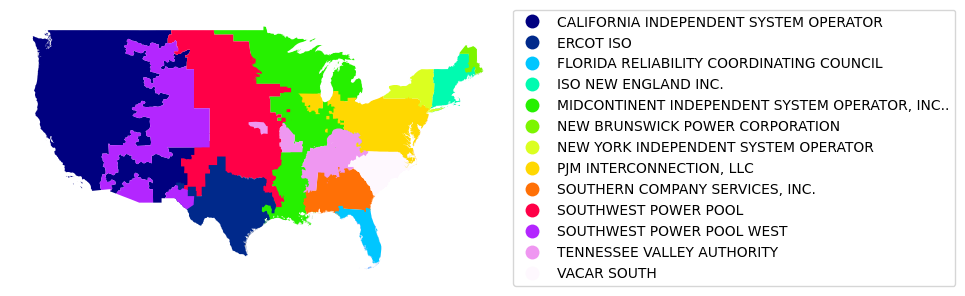

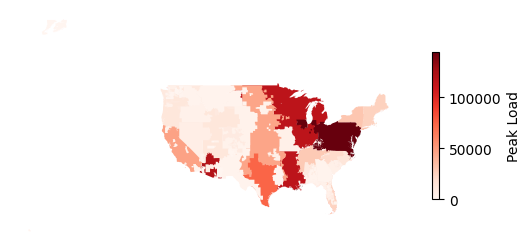

In [18]:
import pandas as pd
import numpy as np
import geopandas as gp

#Plots which NERC Coordinator is responsible for which part of the US
nercCoordinators = gp.read_file("Data/NERC_Reliability_Coordinators.shp")

nercCoordinators.plot(column = "NAME", 
               cmap = "gist_ncar", 
               legend = True, 
               legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
              ).set_axis_off()

#Plots the peak load of each energy planning area in the US
planningAreas = gp.read_file("Data/Planning_Areas.shp")

planningAreas.plot(column = "PEAK_LOAD",
                   cmap = "Reds",
                   legend = True,
                   legend_kwds={'shrink': 0.4, "label": "Peak Load"}
                  ).set_axis_off()